In [1]:
import pandas as pd
import json

# Load the JSON data
file_path = "./output.json"
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)
df.head()


,14,15,31,38,39
stat,"{'PM2.5': [{'time': '2025-03-07 00:00', 'value...","{'PM2.5': [{'time': '2025-03-07 00:00', 'value...","{'PM2.5': [{'time': '2025-03-07 00:00', 'value...","{'PM2.5': [{'time': '2025-03-07 00:00', 'value...","{'PM2.5': [{'time': '2025-03-07 00:00', 'value..."
aqi,"{'PM2.5': [{'time': '2025-04-05 04:00', 'PM25'...","{'PM2.5': [{'time': '2025-04-05 04:00', 'PM25'...","{'PM2.5': [{'time': '2025-04-05 04:00', 'PM25'...","{'PM2.5': [{'time': '2025-04-05 04:00', 'PM25'...","{'PM2.5': [{'time': '2025-04-05 04:00', 'PM25'..."


In [2]:
from collections import defaultdict

# Chuyển dữ liệu về dạng bảng
records = []
station_mapping = {
    '14': '46 Lưu Quang Vũ',
    '15': 'Minh Khai - Bắc Từ Liêm',
    '31': 'Đào Duy Từ',
    '38': 'An Khánh',
    '39': 'Vân Hà'
}
# Dùng dictionary để gộp theo station + time + data_type
grouped_data = defaultdict(dict)

for station_id, station_data in data.items():
    station_name = station_mapping.get(station_id, station_id)
    
    for data_type in ['stat', 'aqi']:
        pollutant_data = station_data.get(data_type, {})
        
        for pollutant, measurements in pollutant_data.items():
            for entry in measurements:
                time = entry.get('time')
                value = entry.get('value') or entry.get(pollutant)
                
                key = (station_name, time, data_type)
                grouped_data[key]['time'] = time
                grouped_data[key]['data_type'] = data_type
                grouped_data[key]['station'] = station_name
                grouped_data[key][pollutant] = value

# Convert grouped data về list
records = list(grouped_data.values())
# Tạo DataFrame
df= pd.DataFrame(records)
# Ép kiểu datetime cho time
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Ép kiểu float cho các cột chỉ số ô nhiễm
pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']
for col in pollutant_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.head()


,time,data_type,station,PM2.5,PM10,NO2,CO,SO2,O3
0,2025-03-07 00:00:00,stat,46 Lưu Quang Vũ,18.49,NaN,90.28,860.9,NaN,3.53
1,2025-03-07 01:00:00,stat,46 Lưu Quang Vũ,20.48,NaN,88.28,842.7,NaN,2.66
2,2025-03-07 02:00:00,stat,46 Lưu Quang Vũ,18.99,NaN,88.73,547.1,NaN,3.10
3,2025-03-07 03:00:00,stat,46 Lưu Quang Vũ,18.56,NaN,88.71,607.5,NaN,3.17
4,2025-03-07 04:00:00,stat,46 Lưu Quang Vũ,21.64,NaN,87.66,427.0,NaN,2.67


In [3]:
df.shape
# As we can see that there are 5400 rows and 9 columns in the dataset

(9045, 9)

In [4]:
df.info()
# Checking the over all information on the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9045 entries, 0 to 9044
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       9045 non-null   datetime64[ns]
 1   data_type  9045 non-null   object        
 2   station    9045 non-null   object        
 3   PM2.5      8357 non-null   float64       
 4   PM10       7574 non-null   float64       
 5   NO2        7331 non-null   float64       
 6   CO         7747 non-null   float64       
 7   SO2        2110 non-null   float64       
 8   O3         2676 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 636.1+ KB


In [5]:
df.isnull().sum()
# There are a lot of missing values present in the dataset

time            0
data_type       0
station         0
PM2.5         688
PM10         1471
NO2          1714
CO           1298
SO2          6935
O3           6369
dtype: int64

In [6]:
df.describe()
# Checking the descriptive stats of the numeric values present in the data like mean, standard deviation, min values and max value present in the data

,time,PM2.5,PM10,NO2,CO,SO2,O3
count,9045,8357.000000,7574.000000,7331.000000,7747.000000,2110.000000,2676.000000
mean,2025-04-08 12:33:17.611940352,46.380664,54.545669,35.186944,355.575500,0.842540,10.578673
min,2025-03-07 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.390000
25%,2025-03-25 20:00:00,25.000000,28.000000,11.300000,2.000000,0.000000,1.870000
50%,2025-04-09 23:00:00,38.630000,43.700000,25.400000,224.500000,0.010000,7.305000
75%,2025-04-22 06:00:00,59.000000,70.000000,52.200000,562.650000,0.660000,15.275000
max,2025-05-05 23:00:00,4987.800000,457.420000,163.100000,3969.400000,18.580000,84.270000
std,NaN,62.968933,43.621579,29.950387,452.858905,2.180661,11.659067


In [7]:
df.nunique()
# These are all the unique values present in the dataframe


time         1440
data_type       2
station         5
PM2.5        2654
PM10         2135
NO2          1601
CO           3683
SO2           369
O3           1359
dtype: int64

In [8]:
df['station'].value_counts()


station
Minh Khai - Bắc Từ Liêm    1885
46 Lưu Quang Vũ            1793
Đào Duy Từ                 1789
An Khánh                   1789
Vân Hà                     1789
Name: count, dtype: int64

[]

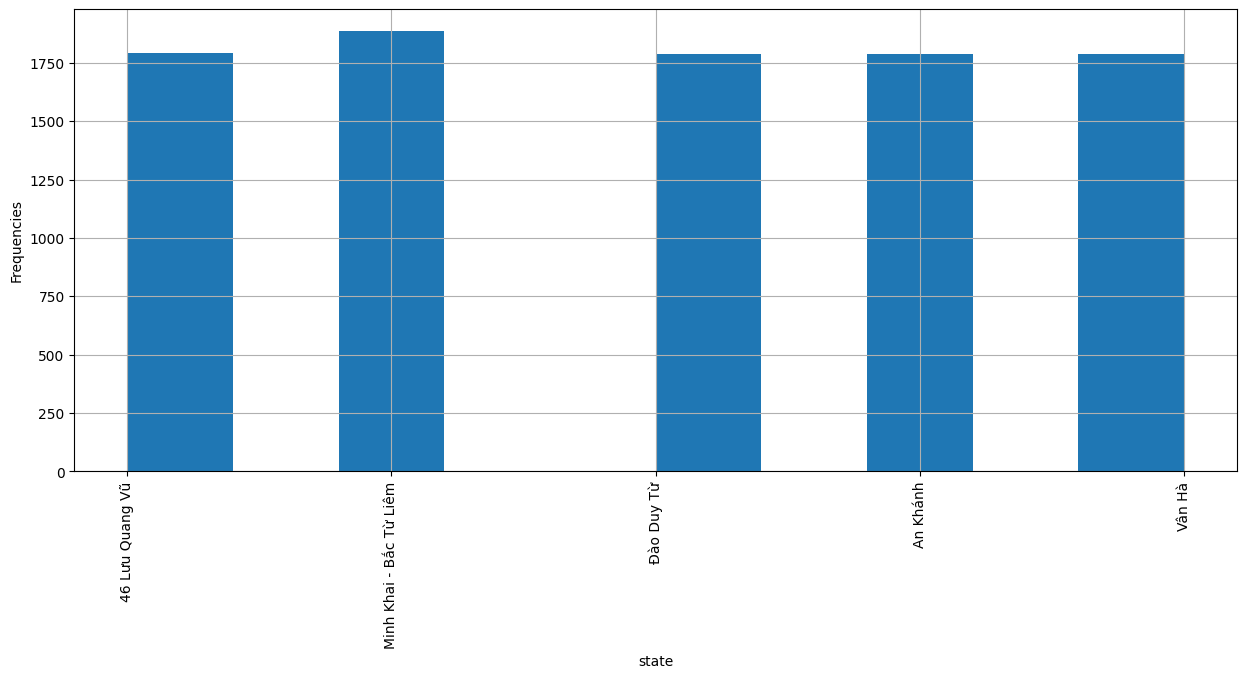

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df['station'].hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()

In [10]:
df['data_type'].value_counts()


data_type
stat    6826
aqi     2219
Name: count, dtype: int64

[]

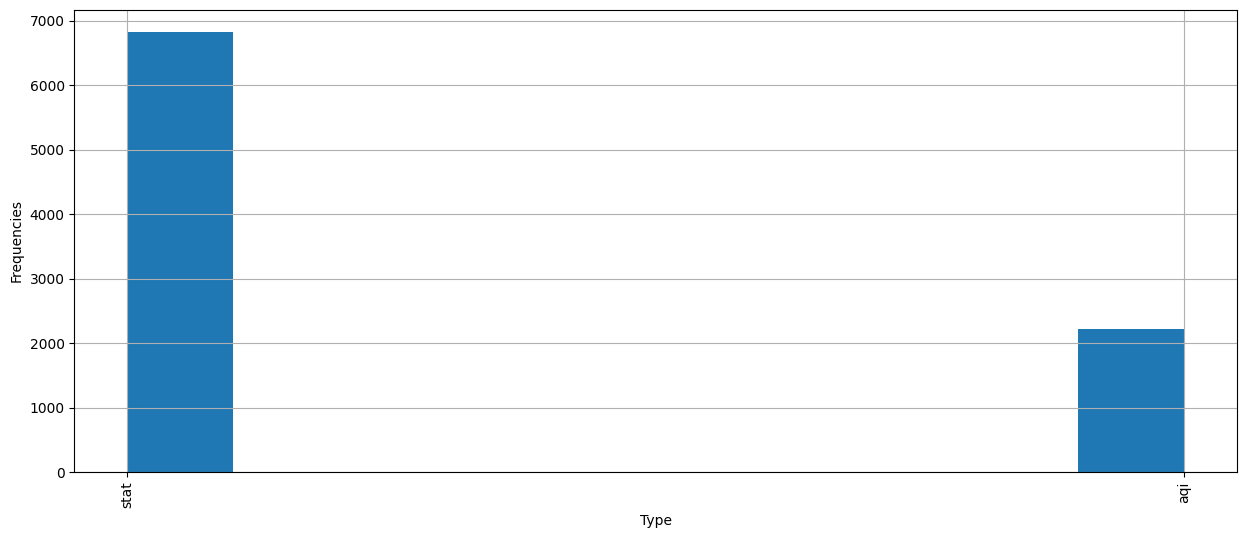

In [11]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df["data_type"].hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()


In [12]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


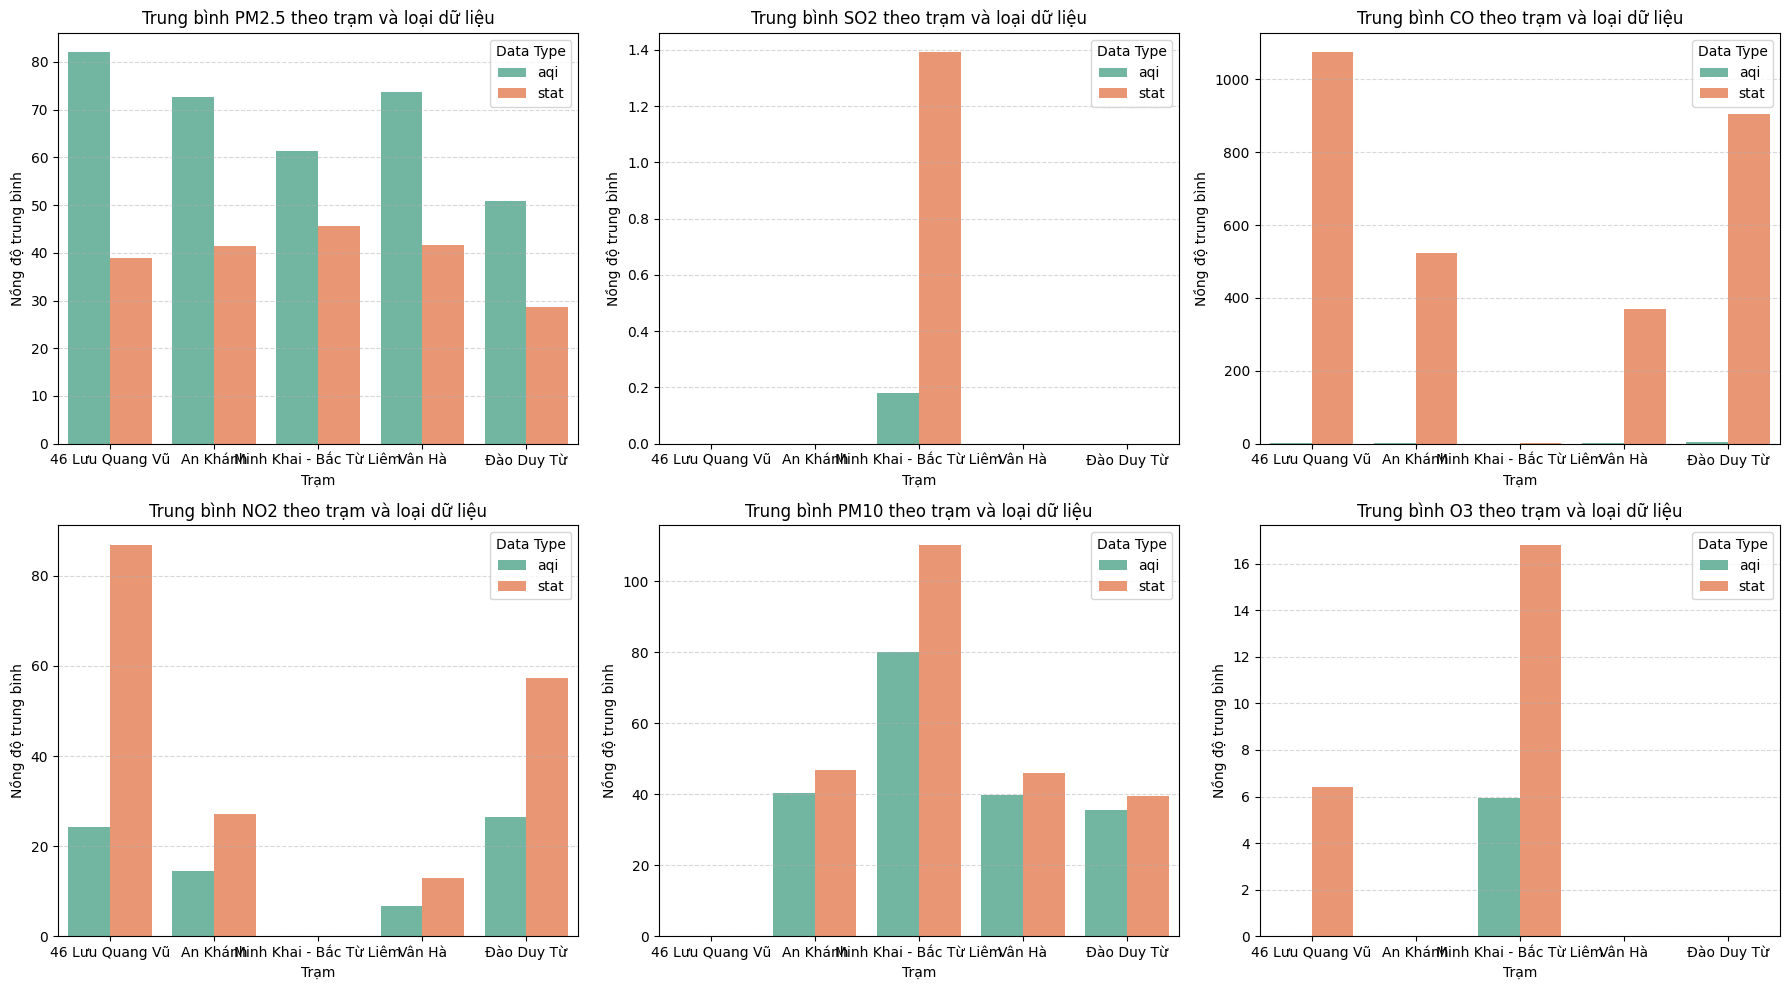

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Các chất ô nhiễm cần vẽ
pollutants = ['PM2.5', 'SO2', 'CO', 'NO2', 'PM10', 'O3']

# Thiết lập kích thước biểu đồ
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Chuyển thành list để duyệt dễ

# Vẽ từng biểu đồ cho từng chất ô nhiễm
for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    
    # Nhóm và tính trung bình theo station và data_type
    avg_df = df.groupby(['station', 'data_type'])[pollutant].mean().reset_index()
    
    # Vẽ barplot
    sns.barplot(
        data=avg_df,
        x='station',
        y=pollutant,
        hue='data_type',
        ax=ax,
        palette='Set2'
    )
    
    ax.set_title(f'Trung bình {pollutant} theo trạm và loại dữ liệu')
    ax.set_ylabel('Nồng độ trung bình')
    ax.set_xlabel('Trạm')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.legend(title='Data Type')

plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_28448\101492470.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_28448\101492470.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_28448\101492470.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_28448\101492470.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_28448\101492470.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_28448\101492470.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


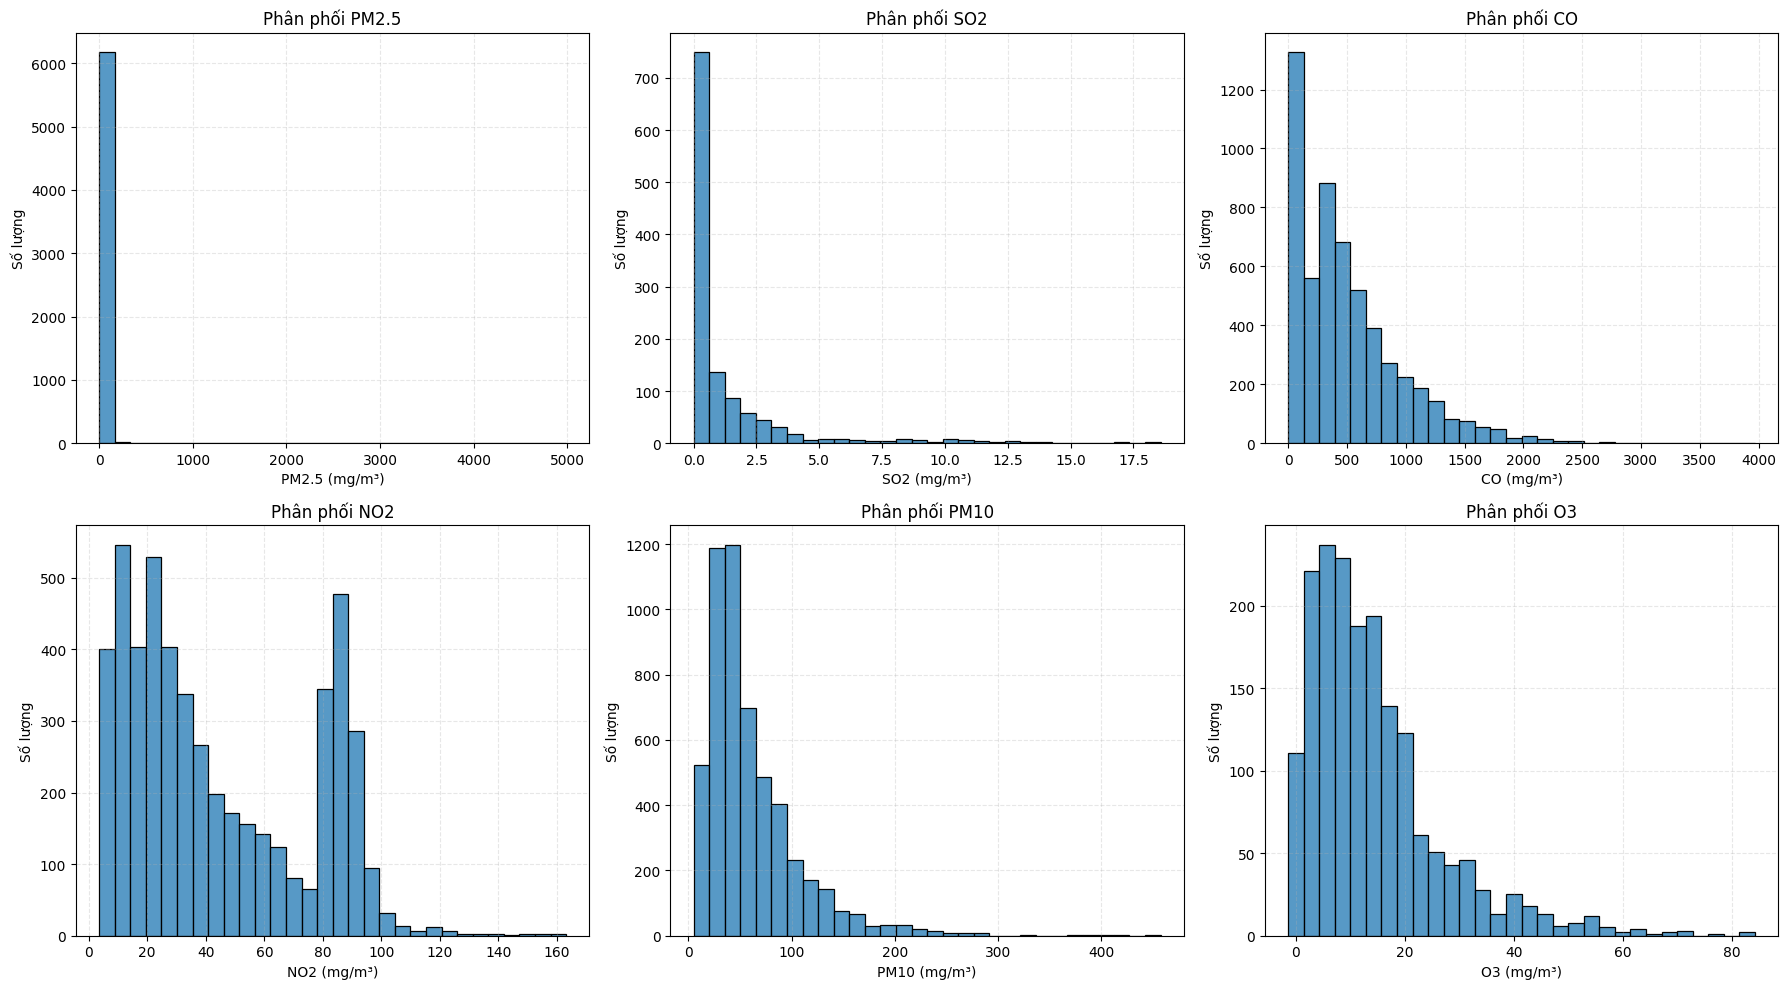

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

df_stat = df[df['data_type'] == 'stat'].copy()
df_aqi = df[df['data_type'] == 'aqi'].copy()

pollutants = ['PM2.5', 'SO2', 'CO', 'NO2', 'PM10', 'O3']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    sns.histplot(
        data=df_stat,
        x=pollutant,
        multiple='stack',        # hoặc 'dodge' nếu muốn song song
        bins=30,                 # số lượng cột
        kde=False,
        palette='Set2',
        ax=ax
    )
    ax.set_title(f'Phân phối {pollutant}')
    ax.set_xlabel(f'{pollutant} (mg/m³)')
    ax.set_ylabel('Số lượng')
    ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()



In [15]:
df['PM2.5'].describe()


count    8357.000000
mean       46.380664
std        62.968933
min         0.000000
25%        25.000000
50%        38.630000
75%        59.000000
max      4987.800000
Name: PM2.5, dtype: float64